In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install language_tool_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyenchant

In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.6 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [817 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit

In [ ]:
import enchant

In [ ]:
d = enchant.Dict("en_US")

In [ ]:
pip install skll

In [ ]:
# Import modules and setup notebook
%matplotlib inline
import sklearn
import numpy as np
import pandas as pd
import re

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.rcParams['figure.dpi']= 100

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn import metrics
from numpy import mean
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score,KFold
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn import ensemble, metrics
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
# # kappa metric for measuring agreement of automatic to human scores
from skll.metrics import kappa


from yellowbrick.regressor import ResidualsPlot
plt.style.use('seaborn-colorblind')

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_colwidth', 100)

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
training_set_features = [  
                'word_count',
                'corrections',
                'similarity',
                'token_count',
                'unique_token_count',
                'nostop_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'organization',
                'caps',
                'person',
                'location',
                'money',
                'time',
                'date',
                'percent',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'det',
                'propn',
                'num',
                'part',
                'intj'
                ]

In [ ]:
df_all_features = [
                'word_count',
                'weights_uncommon',
                'token_count',
                'unique_token_count',
                'nostop_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'det',
                'propn',
                'num',
                'part',
                'intj',
                # 'topic_similarity',
                # 'sent_similarity',
                # 'organization',
                # 'caps',
                # 'person',
                # 'location',
                # 'money',
                # 'time',
                # 'date',
                # 'percent',
               'pct_transitions',
               'grammar_chk',
               'determiners',
               'conjunctions',
               'prn_density',
               'prn_noun_ratio',
               'n_trigram_lemma_types',
               'n_bigram_lemma_types',
               'nlemma_types',
               'nlemmas',
               'n_bigram_lemmas',
               'n_trigram_lemmas',
               'ncontent_tokens',
               'ncontent_types',
               'content_ttr',
               'nfunction_tokens',
               'nfunction_types',
               'function_ttr',
               'noun_ttr',
               'fre',
               'fkg',
               'cli',
               'ari',
               'dcrs', 
               'dw',
               'lwf',
               'gf',
               'num_types',
               'avg_len_word',
               'avg_len_sent', 
               'num_syllab',
               'num_chars',
               'sent_density',
               'ttr',
               'english_usage',
               'pct_rel_trigrams']

In [ ]:
#df.to_pickle('Final_all_Features.pkl')

In [ ]:
training_set = pd.read_pickle('/content/drive/MyDrive/Final_all_Features.pkl')

In [ ]:
training_set1 = pd.read_pickle('/content/drive/MyDrive/training_features.pkl')

In [ ]:
training_set .head()

In [ ]:
X = training_set [df_all_features]
y = training_set['norm_score'].astype(np.float64)

In [ ]:
X.head()

In [ ]:
y

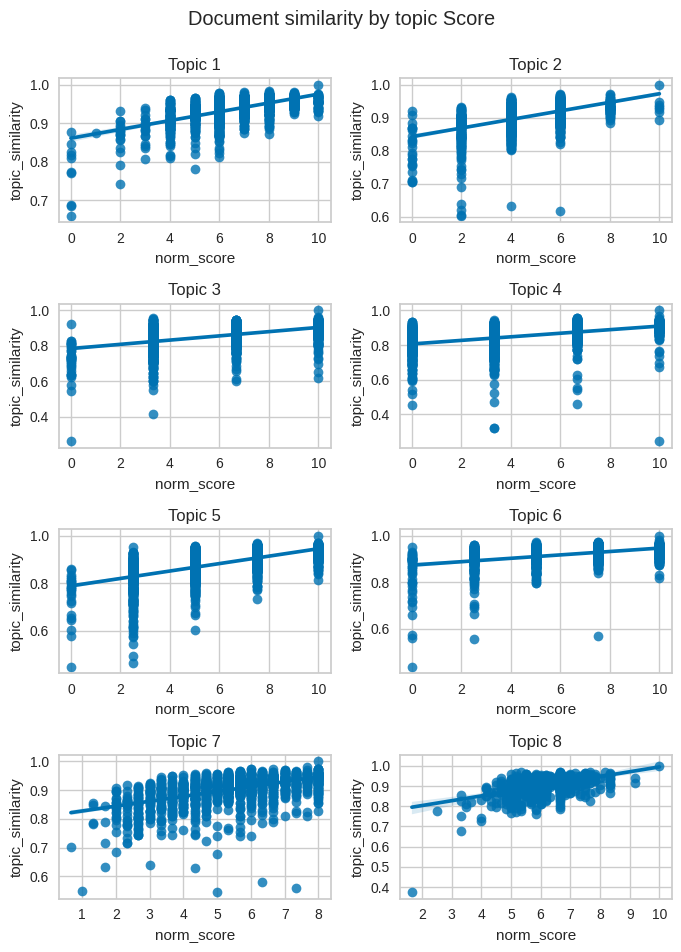

In [ ]:
# Plot document similarity vs target score for each topic
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(7,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.regplot(x='norm_score', y='topic_similarity', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Document similarity by topic Score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('image5.png', dpi=300)
plt.show()

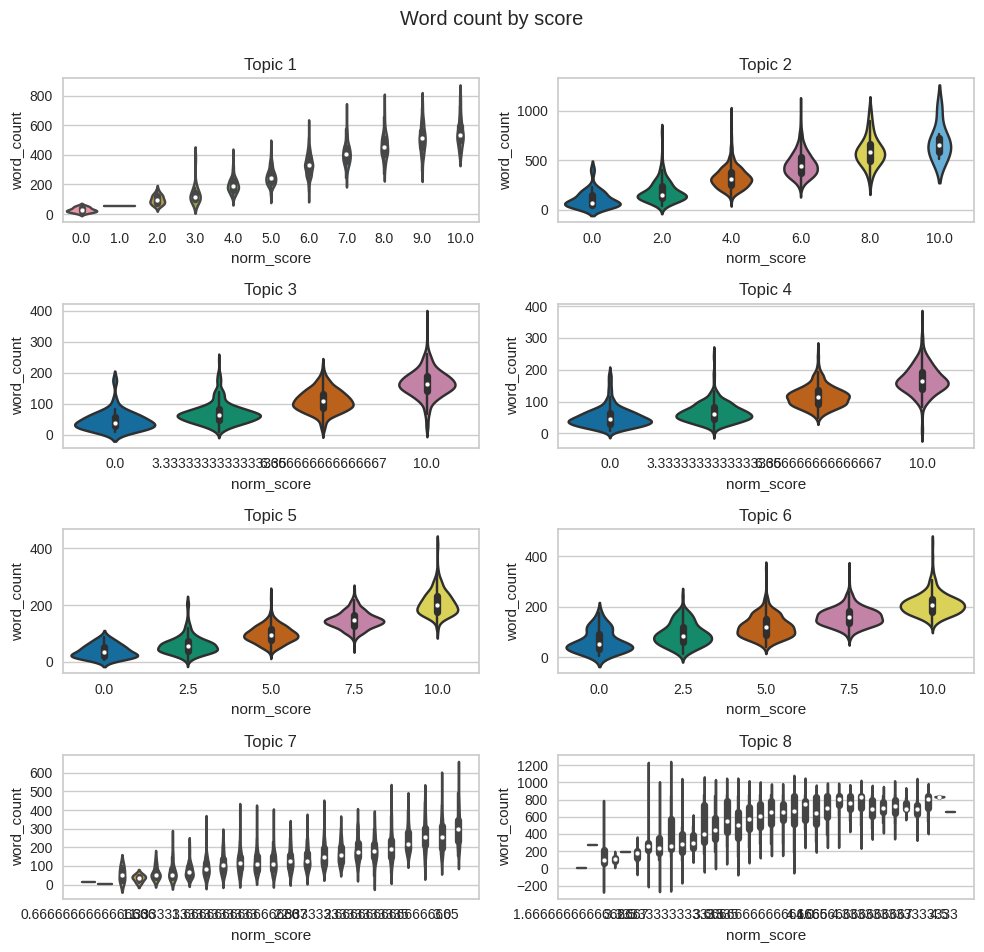

In [ ]:
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(10,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.violinplot(x='norm_score', y='word_count', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Word count by score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

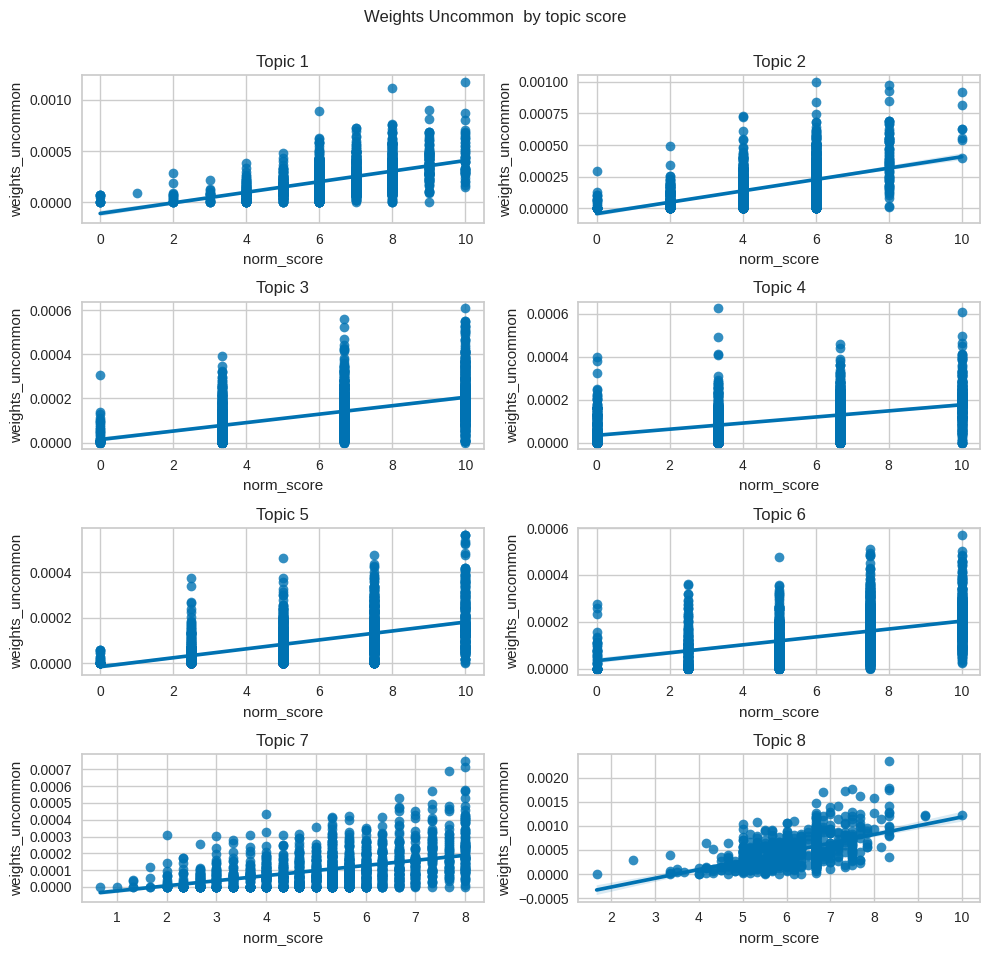

In [ ]:
# Plot document similarity vs target score for each topic
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(10,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.regplot(x='norm_score', y='weights_uncommon', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Weights Uncommon  by topic score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('image5.png', dpi=300)
plt.show()

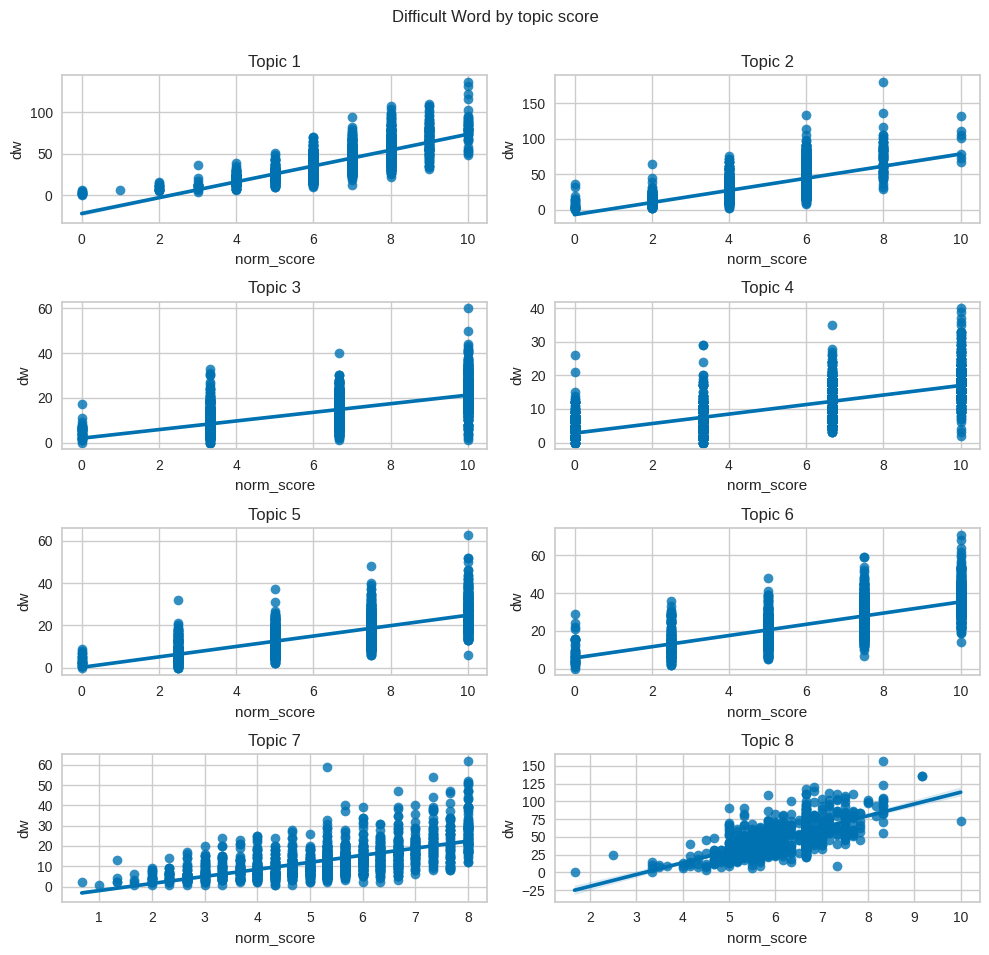

In [ ]:

topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(10,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.regplot(x='norm_score', y='dw', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Difficult Word by topic score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('image5.png', dpi=300)
plt.show()

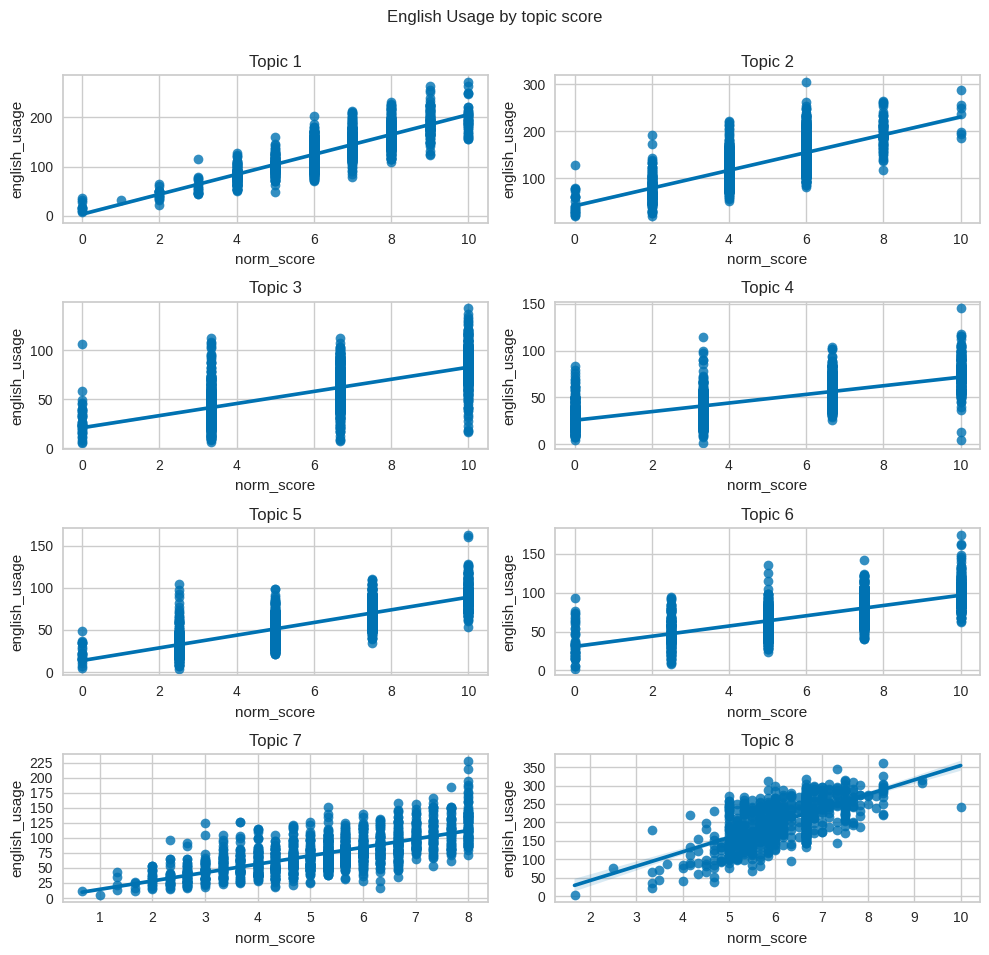

In [ ]:

topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(10,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.regplot(x='norm_score', y='english_usage', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('English Usage by topic score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('image5.png', dpi=300)
plt.show()

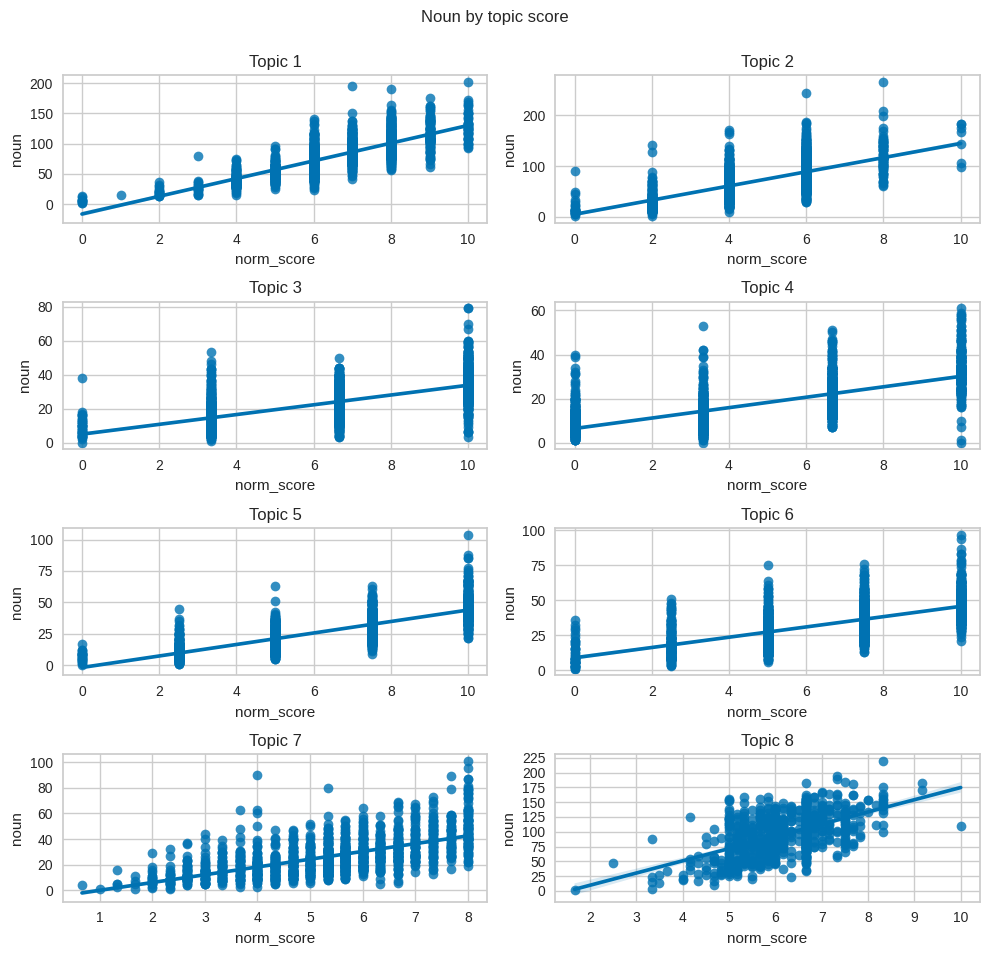

In [ ]:
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(10,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.regplot(x='norm_score', y='noun', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Noun by topic score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('image5.png', dpi=300)
plt.show()

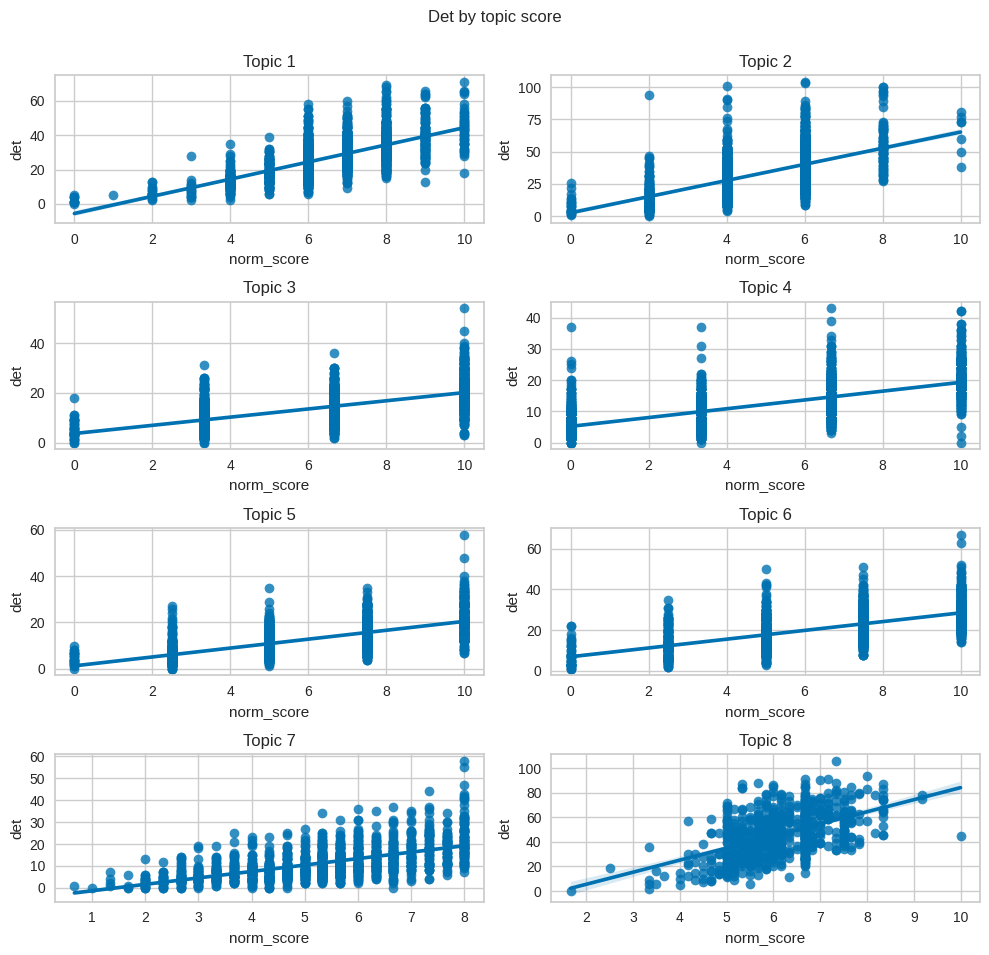

In [ ]:

topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(10,10))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.regplot(x='norm_score', y='det', data=training_set[training_set['topic'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('Topic %i' % topic_number)
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Det by topic score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('image5.png', dpi=300)
plt.show()

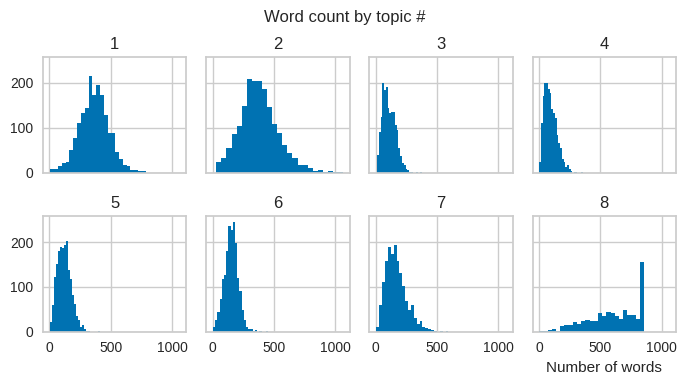

In [ ]:
training_set.hist(column='word_count', by='topic', bins=25, sharey=True, sharex=True, layout=(2, 4), figsize=(7,4), rot=0) 
plt.suptitle('Word count by topic #')
plt.xlabel('Number of words')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
df_all_features = [
                'word_count',
                'weights_uncommon',
                'unique_token_count',
                'nostop_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'num',
                'part',
                'intj',
               'pct_transitions',
               'grammar_chk',
               'determiners',
               'conjunctions',
               'prn_density',
               'prn_noun_ratio',
               'ncontent_tokens',
               'ncontent_types',
               'content_ttr',
               'nfunction_tokens',
               'function_ttr',
               'noun_ttr',
               'fre',
               'fkg',
               'cli',
               'ari',
               'dcrs', 
               'dw',
               'lwf',
               'gf',
               'avg_len_word',
               'avg_len_sent', 
               'num_chars',
               'sent_density',
               'ttr',
               'english_usage',
                'pct_rel_trigrams',
#                 'norm_score'
               ]

     

In [ ]:
X = training_set [df_all_features]
y = training_set['norm_score'].astype(np.float64)

In [ ]:
only_training_data = X.join(y)

In [ ]:
#How each feature affects the price of diamonds
correlations = only_training_data[df_all_features].corr()
correlations["norm_score"].sort_values(ascending=False)

norm_score            1.000000
dw                    0.433242
ncontent_types        0.380146
unique_token_count    0.374489
english_usage         0.366360
weights_uncommon      0.355758
noun                  0.345464
pct_rel_trigrams      0.344265
nostop_count          0.330469
ncontent_tokens       0.320763
num_chars             0.318271
adj                   0.314064
ner_count             0.313218
word_count            0.289080
avg_len_word          0.283566
comma                 0.281039
cli                   0.275511
sent_count            0.275097
pct_transitions       0.261715
adv                   0.251906
verb                  0.248134
nfunction_tokens      0.245112
cconj                 0.193762
quotation             0.190423
num                   0.164579
part                  0.163022
pron                  0.153199
dcrs                  0.098793
exclamation           0.095286
question              0.033941
ari                   0.021160
fkg                   0.014442
intj    

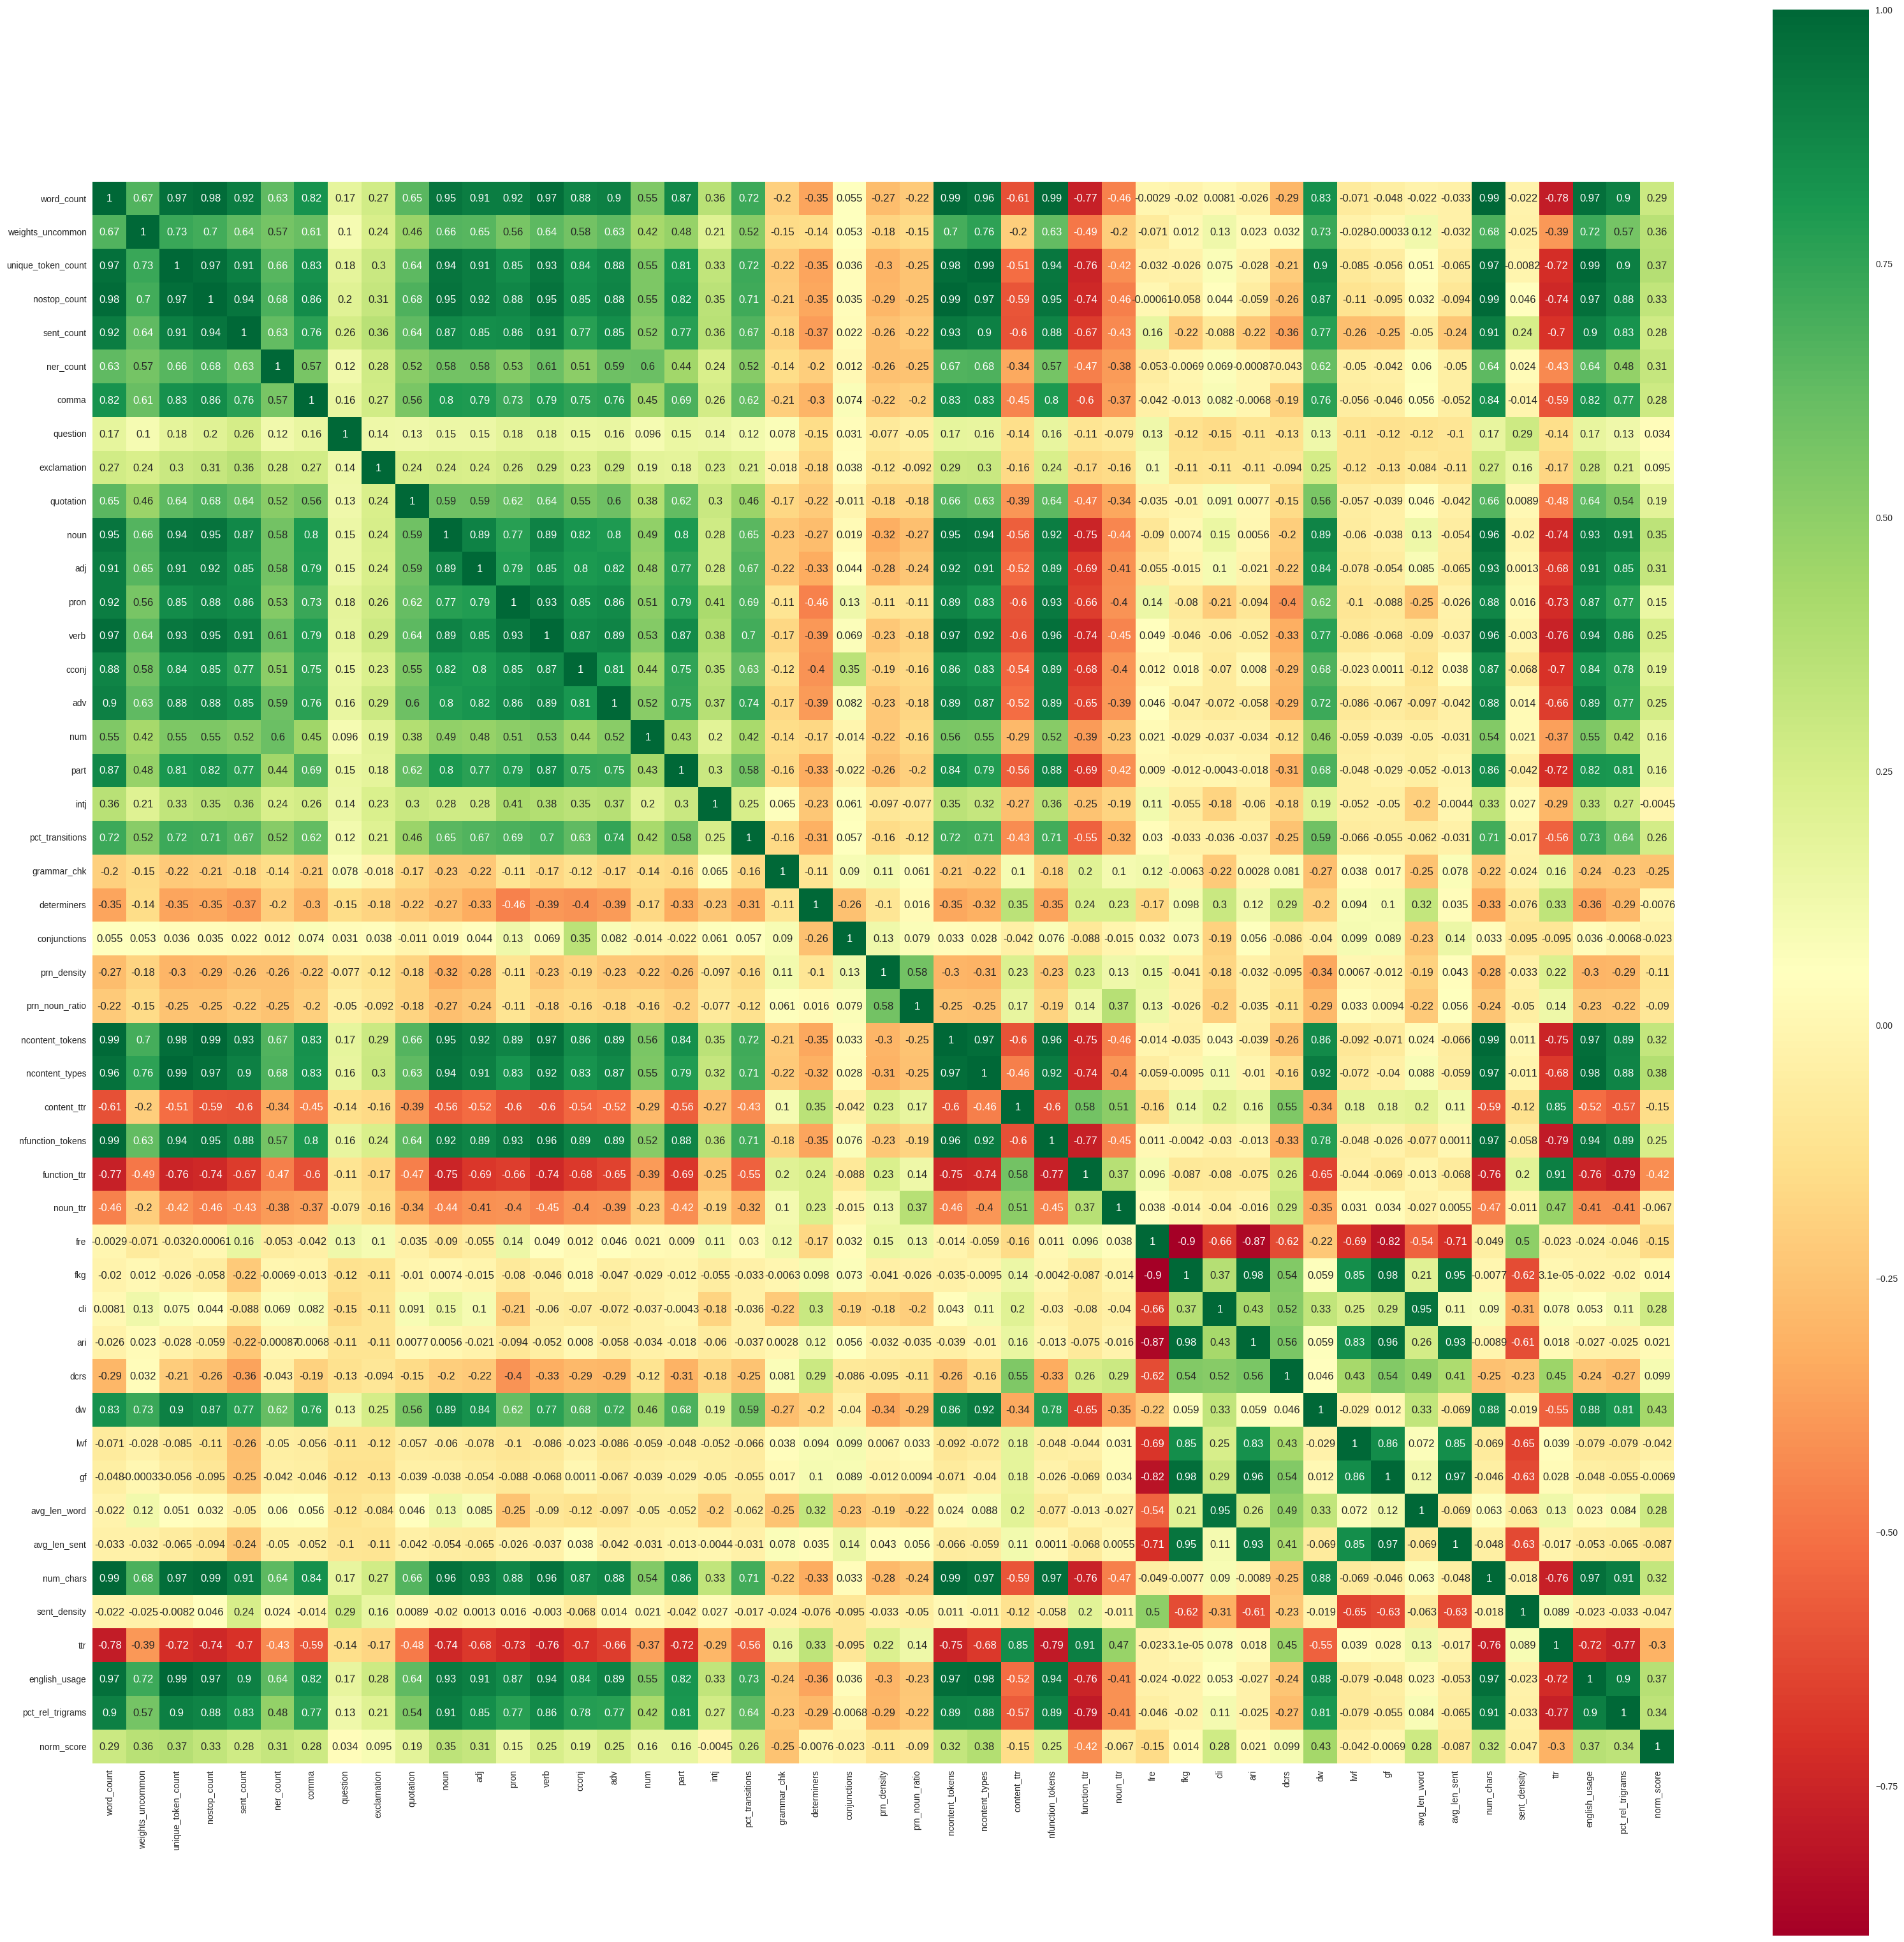

In [ ]:
plt.figure(figsize=(40,40))  # on this line I just set the size of figure to 30 by 30.
p=sns.heatmap(correlations, annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap